# Barplots
---
Bar graphs are useful for displaying relationships between categorical data and at least one numerical variable.

dataset: [IMDB 5000 Movie Dataset](https://www.kaggle.com/deepmatrix/imdb-5000-movie-dataset)

In [332]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (20.0, 10.0)

In [333]:
df = pd.read_csv('../../datasets/movie_metadata.csv')

In [334]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


For the bar plot, let's look at the number of movies in each category, allowing each movie to be counted more than once.


In [335]:
# split each movie's genre list, then form a set from the unwrapped list of all genres
categories = set([s for genre_list in df.genres.unique() for s in genre_list.split("|")])

# one-hot encode each movie's classification
for cat in categories:
    df[cat] = df.genres.transform(lambda s: int(cat in s))
# drop other columns
df = df[['director_name','genres'] + list(categories)]



In [336]:
# convert from wide to long format and remove null classificaitons
df = pd.melt(df,
             id_vars=[],
             value_vars = list(categories),
             var_name = 'Category',
             value_name = 'Count')
df = df.loc[df.Count>0]

# count the instances of each category
df = pd.DataFrame(df.groupby('Category').size(), columns=['Count'])
df['Category'] = df.index

In [337]:
df.head()

,Count,Category
Category,,
Action,1153,Action
Adventure,923,Adventure
Animation,242,Animation
Biography,293,Biography
Comedy,1872,Comedy


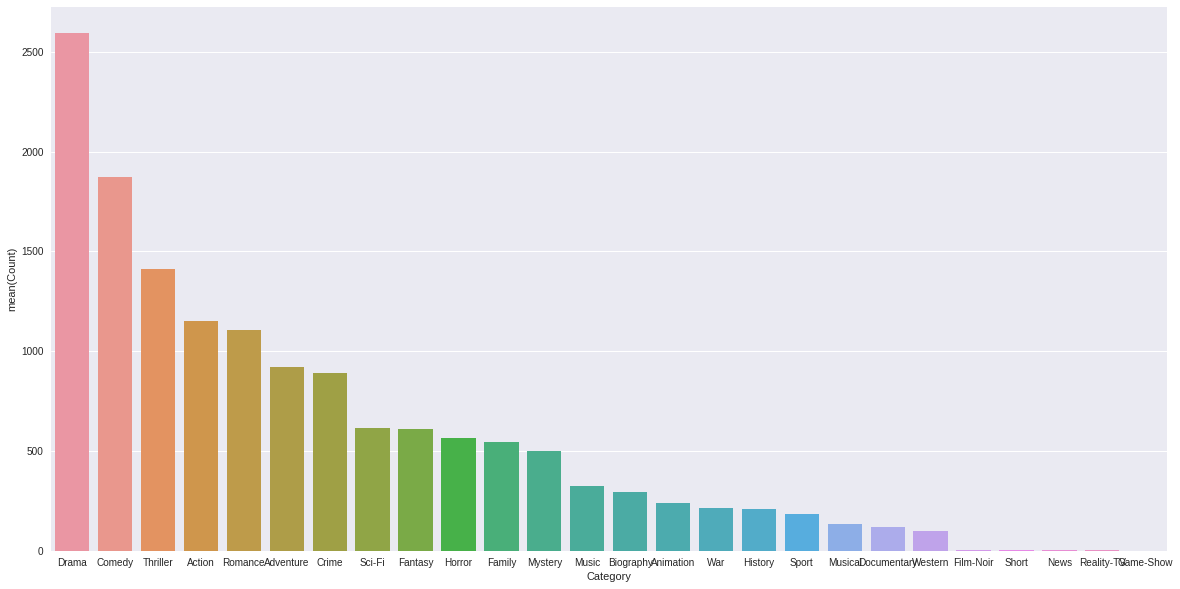

In [347]:
p = sns.barplot(data=df.sort_values('Count', ascending=False),
                x = 'Category',
                y = 'Count')

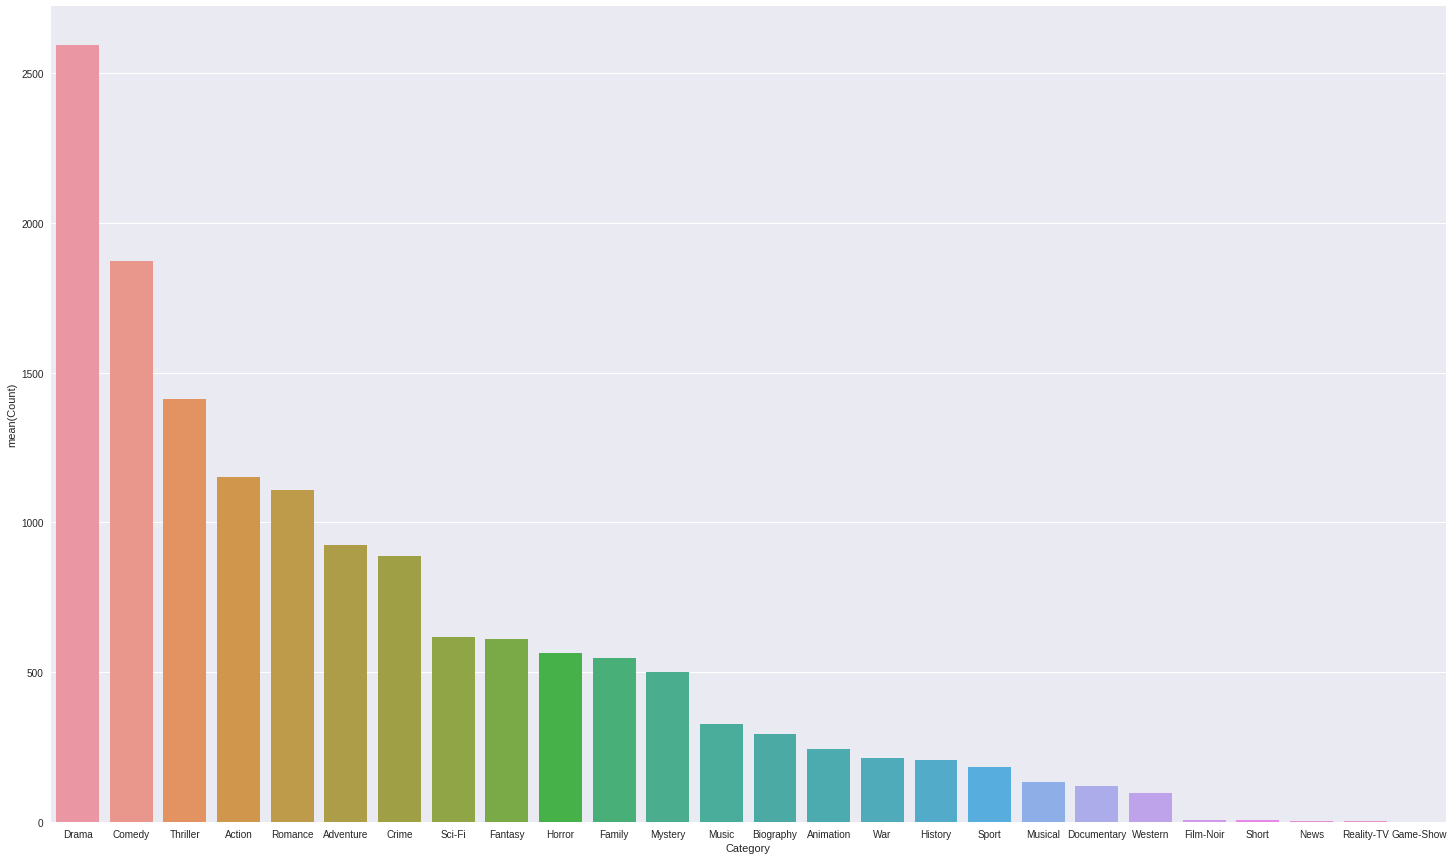

In [353]:
plt.rcParams['figure.figsize']=(25,15)
p = sns.barplot(data=df.sort_values('Count', ascending=False),
                x = 'Category',
                y = 'Count')

In [343]:
p.get_figure().savefig('../figures/barplot.png')